# Gradient boosting regression models

The custom class TimeSeriesGBR from `tsgbr.py` used here is a child class of `sklearn.ensemble.GradientBoostingRegressor`, inheriting everything from this class. It extends this class with several attributes and methods for easy-to-use modeling and forecasting of time series with gradient boosting regression models. It requires as input and returns as output pandas series with PeriodIndex. 

Gradient boosting regression models can model the seasonality of a time series in a relatively flexible fashion by generating an array with time sequences for each frequency provided (e.g. integers from 1 to 12 for each year in the series).

### References

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsgbr import TimeSeriesGBR
import tshelper as h

plt.style.use("seaborn-whitegrid")

## Load and prepare data

In [2]:
# Load data
df = pd.read_csv("data/catalog_seasfac.csv",
                 usecols=["date", "men", "women", "jewel", "mail", "page", "phone", "print", "service"],
                 index_col = "date")

# Convert index to PeriodIndex
df.index = pd.to_datetime(df.index).to_period("M")

# Define features and target
y = df["women"]
X = df[["mail", "page", "phone", "print", "service"]]

# Show features and target
X.join(y).head()

,mail,page,phone,print,service,women
date,,,,,,
1989-01,7978,73,34,22294.48,20,16578.93
1989-02,8290,88,29,27426.47,20,18236.13
1989-03,8029,65,24,27978.66,26,43393.55
1989-04,7752,85,20,28949.65,22,30908.49
1989-05,8685,74,17,22642.27,21,28701.58


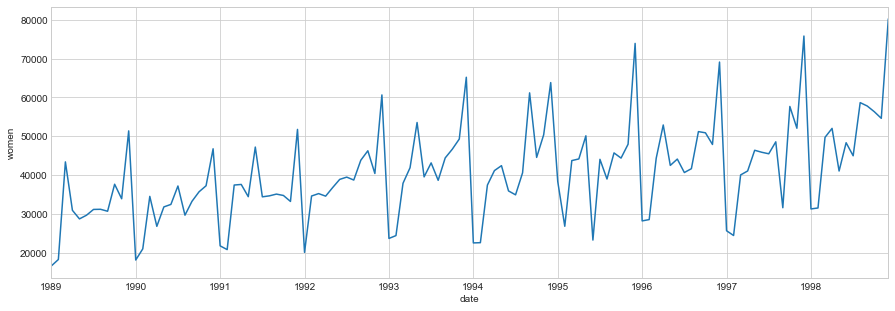

In [3]:
# Visualize target
h.plot_series(y, xlabel=y.index.name, ylabel=y.name)

## Train/test split

In [4]:
X_train = X[:"1997"]
y_train = y[:"1997"]
X_test = X["1998"]
y_test = y["1998"]

## Univariate Gradient Boosting Regression model

R-squared:               1.0930
Root mean squared error: 7558.0697
Mean absolute error:     6595.7527


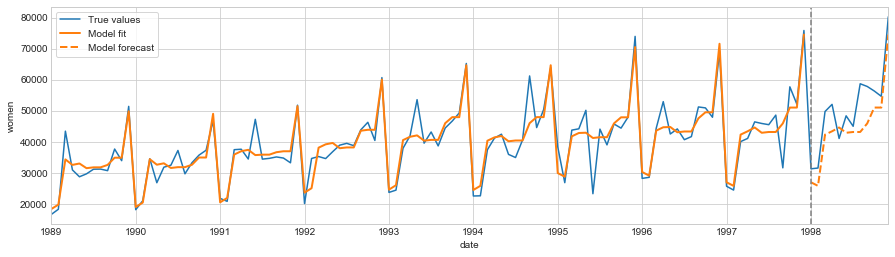

In [5]:
# Instantiate model with yearly, quarterly and monthly seasonality
model = TimeSeriesGBR(y=y_train, max_depth=2, n_estimators=100, frequencies=["year", "quarter", "month"])

# Train model
model = model.fit_ts()

# Predict and forecast
y_pred = model.predict_ts()
y_fcst = model.forecast_ts(12)

# Evaluate model on test set
h.eval_model(y_test, y_fcst)

# Visualize fit and forecast
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

In [6]:
# Show generated dataframe of frequencies and time sequences
model.X_endog.head(5)

,year,quarter,month
date,,,
1989-01,1989,1,1
1989-02,1989,1,2
1989-03,1989,1,3
1989-04,1989,2,4
1989-05,1989,2,5


In [7]:
# Feature importances
print(dict(zip(model.frequencies, [round(fi, 4) for fi in model.feature_importances_])))

{'year': 0.2577, 'quarter': 0.0072, 'month': 0.7351}


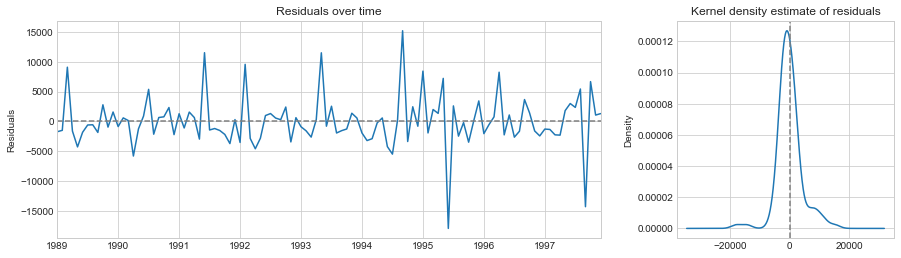

In [9]:
# Plot residuals
h.plot_residuals(y_train-y_pred)

### Training with staged prediction

This method fits a gradient boosting regression model to the target using staged prediction over all 'n_estimators' and stores the model with the lowest RMSE in a test set. This avoids overfitting.

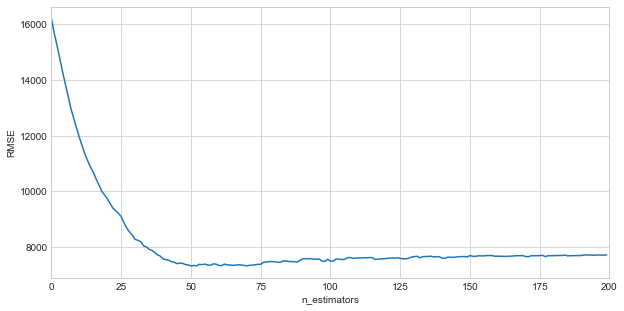

In [10]:
# Instantiate model with yearly, quarterly and monthly seasonality
model = TimeSeriesGBR(y=y_train, max_depth=2, frequencies=["year", "quarter", "month"])

# Train model
model = model.fit_ts_with_staged_predict(y_test=y_test, n_estimators=200)

# Show RMSE for each n_estimator
model.plot_n_estimators()

In [11]:
# n_estimators with lowest RMSE on test set
model.n_estimators

50

R-squared:               1.0137
Root mean squared error: 7353.9132
Mean absolute error:     6347.6044


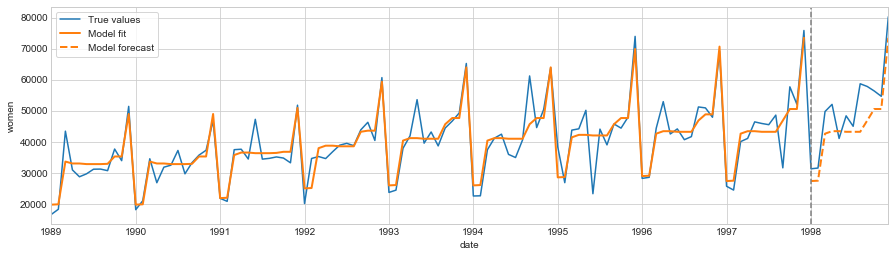

In [12]:
# Predict and forecast
y_pred = model.predict_ts()
y_fcst = model.forecast_ts(12)

# Evaluate model on test set
h.eval_model(y_test, y_fcst)

# Visualize fit and forecast
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

## Gradient boosting regression model with exogenous variables

<i>to be done</i>